### Import dependencies

In [14]:
import requests
from bs4 import BeautifulSoup
import yake
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Web scrapping  

In [79]:
# specify url and scrape the data
url= "https://www.quantamagazine.org/brains-background-noise-may-hold-clues-to-persistent-mysteries-20210208/"
response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")
data_text = soup.get_text()

### Data Storage

In [80]:
# store the data as a text file named scraped_data.txt
with open("web_data.txt", "w", encoding="utf-8") as file:
    file.write(data_text)

### Data Preprocessing

In [81]:
# read the text data from text file
with open("web_data.txt", "r", encoding="utf-8") as file:
    text_data = file.read()

# lower case text
clean_text_data = text_data.lower()


### Keyword identifier

In [82]:
# extract keywords using yake- yake.KeywordExtractor()

# specify text input
text = clean_text_data

# specify parameters
language = "en"
max_ngram_size = 3
dedup_threshold = 0.9
n_keywords = 20

# customized extraction
custom_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=dedup_threshold, top=n_keywords, features=None)

# extract keywords
kw_extracted = custom_extractor.extract_keywords(text)

# initialize empty list to store keywords
keywords_list=[]

# store keywords in a list
for kw in kw_extracted:
    keywords_list.append(kw)

# print the list of keywords
print(keywords_list)

[('brain activity', 0.0031114115953559825), ('brain', 0.004455818329789589), ('aperiodic activity', 0.0057794020627373105), ('activity', 0.006844844920664325), ('aperiodic', 0.007573167752221318), ('aperiodic signals', 0.008574521839558072), ('voytek', 0.01191216409082451), ('aperiodic brain activity', 0.011940226611494503), ('noise', 0.013776283456053676), ('data', 0.01684594199108201), ('signals', 0.022425981296621232), ('scientists', 0.023682287537236148), ('waves', 0.02961925811108815), ('lendner', 0.030976232393228553), ('brain waves', 0.036538638126722194), ('aperiodic noise', 0.03830186357024524), ('n’t', 0.040106246841776494), ('slope', 0.04320519148402042), ('infant brain activity', 0.04465128175306186), ('eeg data', 0.04636631029660695)]


### Data Visualization


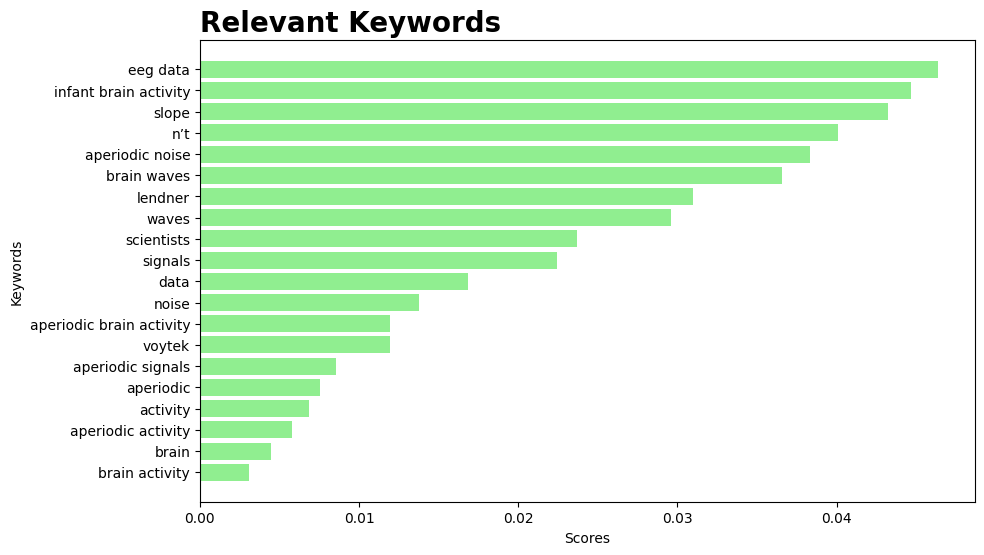

In [83]:
# 1. Bar Chart:

# separate keywords and scores
keywords, scores = zip(*keywords_list)

# make a horizontal bar chart to visualize the keywords and their scores
plt.figure(figsize=(10, 6))
plt.barh(keywords, scores, color='lightgreen')
plt.xlabel('Scores')
plt.ylabel('Keywords')
plt.title('Relevant Keywords', fontsize=20, color='black', fontweight='bold', loc='left')

plt.show()


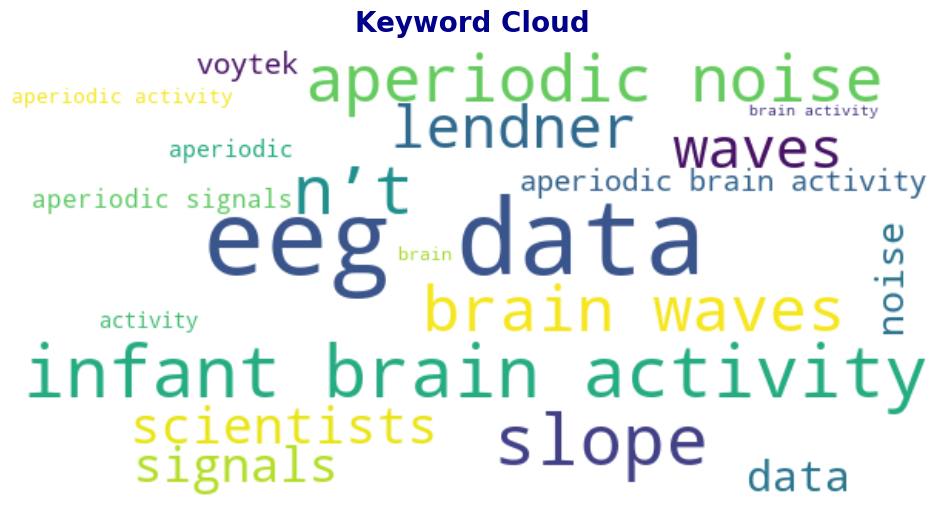

In [84]:
# 2. Keyword Cloud:

# create a dictionary with keywords as keys and scores as values
keyword_scores_dict = {keyword: score for keyword, score in keywords_list}

# create a WordCloud object with scores as the "weights" for word size
wordcloud = WordCloud(width=600, height=300, background_color='white').generate_from_frequencies(keyword_scores_dict)

# display the word cloud using matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keyword Cloud',color='darkblue', fontsize=20, fontweight='bold')

plt.show()
